# Uncovering Patterns: How Property Features Drive Housing Market Prices?

## Table of Contents

- [Introduction](#Introduction)
- [Data Cleaning/Loading](#Data-Cleaning/Loading)
- [Summary Statistics Tables](#Summary-Statistics-Tables)
- [Plots, Histograms, Figures](#Plots-Histograms-Figures)
- [Conclusion](#Conclusion)
- [References](#References)

## Introduction

In the midst of the escalating challenge of attaining affordable housing in the United States, where the prospect of home ownership or securing affordable rentals is becoming increasingly elusive, this project strives to address the issue by delving into patterns within the housing market. Specifically, we focus on understanding the influential role played by various property features in determining housing prices. Leveraging data from realtor.com (Realtor), a widely-used real estate platform, our analysis seeks to unravel the intricate relationships between key property attributes and their impacts on the dynamics of the housing market.

The chosen independent variables (Xs) for this study — bedrooms, bathrooms, property size (acres), home size (square feet), and the previously sold date — are thoughtfully selected to address the research question: Uncovering Patterns - How Property Features Drive Housing Market Prices?. Bedrooms and bathrooms act as indicators of a property's size and amenities, directly impacting its market value by providing increased space and enhanced features. Property size and home size collectively represent the physical dimensions of a residence, influencing desirability and subsequent pricing. Larger properties, in terms of both land and living space size, generally command higher market values as well. The inclusion of the previously sold date offers historical context, providing insights into a property's market performance over time and aiding the comprehension of current market trends. Analyzing these variables aims to elucidate the intricate relationships between property features and housing market dynamics, contributing to a more nuanced understanding of the factors influencing real estate prices.

Beyond academic significance, the research question holds practical relevance for both buyers and sellers. Prospective homebuyers can gain valuable insights into pricing variations driven by specific property features, empowering them with information crucial to their decision-making process. Sellers, armed with a deep understanding of factors influencing housing prices, can strategically position their properties in the market. The collective examination of these variables contributes to an enhanced awareness of the complex dynamics underlying house pricing, offering valuable guidance for navigating the real estate landscape effectively.




## Data Cleaning/Loading

In [1]:
import pandas as pd

# Step 1: Load the dataset
ogData = pd.read_csv('realtor-data.zip.csv')
ogData.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [2]:
# Step 2: Remove rows with N/A values
ogData.dropna(inplace=True)
ogData

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
3380,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
5083,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
5387,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
9053,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
...,...,...,...,...,...,...,...,...,...,...
1401060,for_sale,3.0,1.0,0.10,Dunkirk,New York,14048.0,1002.0,2017-04-03,29900.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [3]:
# Step 3: Check for duplicated rows
duplicated_rows = ogData.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_rows}")

Number of duplicated rows: 348394


In [4]:
# Step 4: Remove duplicated rows
ogData.drop_duplicates(inplace=True)
ogData

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
10344,for_sale,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,950000.0
10351,for_sale,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,6899000.0
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0
...,...,...,...,...,...,...,...,...,...,...
1400975,for_sale,4.0,2.0,0.50,Friendship,New York,14739.0,1822.0,2014-12-26,147500.0
1400992,for_sale,3.0,3.0,61.60,Belmont,New York,14813.0,1436.0,2006-08-07,469900.0
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0


In [5]:
# Step 5: Convert 'prev_sold_date' to datetime and create a copy of the DataFrame
ogData = ogData.copy()
ogData['prev_sold_date'] = pd.to_datetime(ogData['prev_sold_date'])
ogData['prev_sold_year'] = ogData['prev_sold_date'].dt.year
ogData.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_year
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019
10344,for_sale,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,950000.0,2013
10351,for_sale,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,6899000.0,2018
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0,2014
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0,2012


In [6]:
# Step 6: Remove 'prev_sold_date' and create a new DataFrame called 'cleanedData'
# 'cleanedData' dataset will be used throughout the entire code of project 1
cleanedData = ogData.drop('prev_sold_date', axis=1)
cleanedData

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,prev_sold_year
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,110000.0,2019
10344,for_sale,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,950000.0,2013
10351,for_sale,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,6899000.0,2018
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,525000.0,2014
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,289900.0,2012
...,...,...,...,...,...,...,...,...,...,...
1400975,for_sale,4.0,2.0,0.50,Friendship,New York,14739.0,1822.0,147500.0,2014
1400992,for_sale,3.0,3.0,61.60,Belmont,New York,14813.0,1436.0,469900.0,2006
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,118500.0,2004
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,189900.0,1999


In [7]:
# Step 7: Check the type of each variable to ensure the correct data types
data_types = cleanedData.dtypes
print(data_types)

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
price             float64
prev_sold_year      int32
dtype: object


## Summary Statistics Tables

In [8]:
# Step 1: Calculate summary statistics for specific columns from 'cleanedData'
summary_cleanedD = cleanedData[['bed', 'bath', 'acre_lot', 'house_size', 'prev_sold_year', 'price']].describe()

# Step 2: Rename columns for better readability
summary_cleanedD.columns = ['Number of Bedrooms', 'Number of Bathrooms', 'Property Size (acres)', 'House Size (sq. ft.)', 'Previously Sold Year', 'Price (USD)']

# Step 3: Customize styling for the summary statistics table
summary_cleanedData = summary_cleanedD.style.format({
    'Number of Bedrooms': '{:.1f}', 
    'Number of Bathrooms': '{:.1f}',
    'Property Size (acres)': '{:.1f}',
    'House Size (sq. ft.)': '{:.1f}',
    'Previously Sold Year': '{:.0f}',
    'Price (USD)': '${:,.0f}'
}).set_caption('<h1 style="color: skyblue; text-align: center;">Summary Statistics</h1>')

# Step 4: Display the summary statistics
summary_cleanedData


,Number of Bedrooms,Number of Bathrooms,Property Size (acres),House Size (sq. ft.),Previously Sold Year,Price (USD)
count,45192.0,45192.0,45192.0,45192.0,45192,"$45,192"
mean,3.7,2.6,18.7,2247.5,2009,"$722,248"
std,1.5,1.5,800.7,1890.2,10,"$1,526,089"
min,1.0,1.0,0.0,170.0,1901,$1
25%,3.0,2.0,0.1,1320.0,2002,"$248,500"
50%,3.0,2.0,0.2,1804.0,2010,"$399,900"
75%,4.0,3.0,0.6,2576.0,2018,"$699,000"
max,75.0,39.0,86139.0,85142.0,2023,"$60,000,000"


## Interpretation 

In our examination of summary statistics for variables potentially influencing housing markets, we delve into key aspects such as the number of bedrooms, bathrooms, property size, house size, previously sold year,

**Number of Bedrooms:**
The dataset features houses with bedrooms ranging from 1 to a maximum of 75. The mean number of bedrooms is approximately 3.7, with a standard deviation of 1.5, indicating significant variability in property sizes. This variability, potentially driven by the number of bedrooms, could play an influential role in determining housing market prices. Further analysis is needed to confirm this potential correlation.

**Number of Bathrooms:**
Similar to bedrooms, the dataset reveals a range of 1 to 39 bathrooms, with a mean of approximately 2.6 and a standard deviation of 1.5. Most houses have around 2 to 3 bathrooms, showcasing variability. This suggests that the number of bathrooms could potentially be an influential variable in driving housing prices, prompting further analysis into specific bathroom counts' potential impacts on pricing.

**Property Size in Acres:**
The dataset displays widely varying property sizes, ranging from 0 to a maximum of 86,139 acres, with a mean size of 18.7 acres and a substantial standard deviation of 800.7. Understanding the distribution of property sizes is crucial, as larger properties generally command higher market values (Padala, 2021). The high standard deviation emphasizes the need to explore how specific acreages relate to housing prices. 

**House Size (sq. ft.):**
House sizes exhibit a broad range from 170 to 85,142 square feet, with an average size of 2,247.5 square feet and a standard deviation of 1,890.2. This variability implies that houses come in various sizes within the dataset. While common trends suggest a positive correlation between house size and market values (Padala, 2021), further statistical analyses are required to validate this assumption, contributing to the investigation into how property features drive housing market prices.

**Previously Sold Year:**
The dataset encompasses previously sold years from 1901 to 2023, with a mean year of 2009 and a standard deviation of 10. This suggests that, on average, houses were last sold around the aftermath of the 2008 financial crisis. The standard deviation underscores variability around this average, providing historical context to understand how temporal changes may influence housing values.

**Price (USD):**
Housing prices in the dataset range from `$1` to `$60,000,000`, with a mean price of `$722,248` and a high standard deviation of `$1,526,089`, indicating a wide range of prices. This emphasizes the importance of exploring how each property feature contributes to the observed variability in housing prices.

This summary statistics snapshot encapsulates the diversity within our dataset, showcasing variations in the number of bedrooms, bathrooms, property size, house size, previously sold year, and housing prices. These variations lay the foundation for our forthcoming in-depth analysis, which aims to uncover potential correlations between these features and housing prices. Our systematic approach ensures a comprehensive investigation, employing statistical analyses to reveal meaningful insights into the intricate dynamics of the housing market. As we progress, these analyses will enhance our understanding of how each property feature contributes to the complexities of housing prices, ensuring a robust exploration of potential relationships.


## Plots, Histograms, Figures

## Frequency Histogram for Independent and Dependent Variables

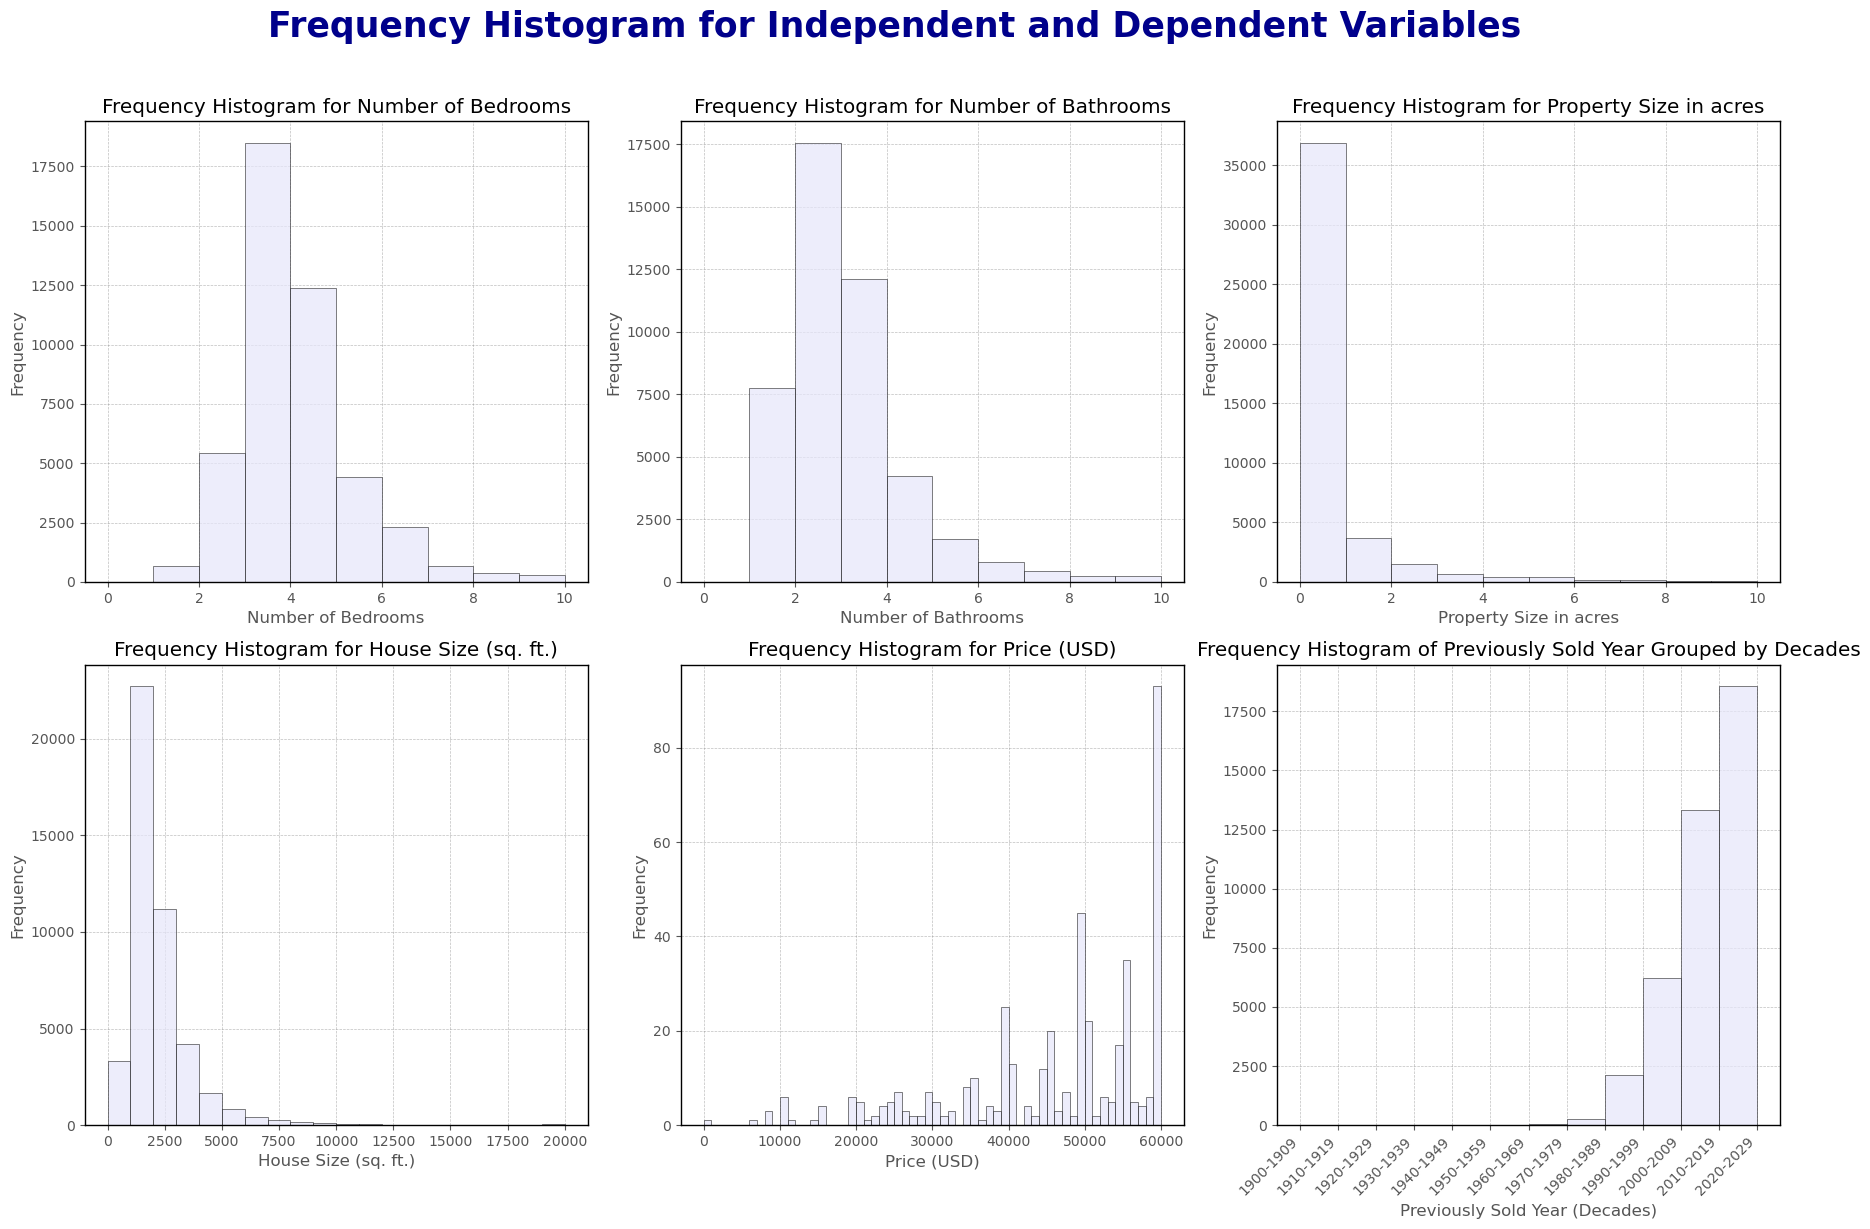

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
plt.style.use('ggplot')

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Function to add border and white background to each subplot
def add_border_background(ax):
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    ax.set_facecolor('white')
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Histogram for 'bed'
custom_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
histogram, edges, _ = axes[0, 0].hist(cleanedData['bed'], bins=custom_bins, color='lavender', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Frequency Histogram for Number of Bedrooms')
add_border_background(axes[0, 0])

# Histogram for 'bath'
histogram, edges, _ = axes[0, 1].hist(cleanedData['bath'], bins=custom_bins, color='lavender', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Frequency Histogram for Number of Bathrooms')
add_border_background(axes[0, 1])

# Histogram for 'acre_lot'
histogram, edges, _ = axes[0, 2].hist(cleanedData['acre_lot'], bins=custom_bins, color='lavender', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Property Size in acres')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Frequency Histogram for Property Size in acres')
add_border_background(axes[0, 2])

# Histogram for 'house_size'
histogram, edges, _ = axes[1, 0].hist(cleanedData['house_size'], bins=range(0, 21000, 1000), color='lavender', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('House Size (sq. ft.)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Frequency Histogram for House Size (sq. ft.)')
add_border_background(axes[1, 0])

# Histogram for 'prev_sold_year'
min_year = cleanedData['prev_sold_year'].min()
max_year = cleanedData['prev_sold_year'].max()
bins = range(min_year // 10 * 10, (max_year // 10 + 1) * 10, 10)
histogram, edges, _ = axes[1, 2].hist(cleanedData['prev_sold_year'], bins=bins, color='lavender', edgecolor='black', alpha=0.7)

# -Customize x-axis labels to represent decades
axes[1, 2].set_xticks(bins)
axes[1, 2].set_xticklabels([f'{start}-{start+9}' for start in bins], rotation=45, ha='right')

# -Set labels and title
axes[1, 2].set_xlabel('Previously Sold Year (Decades)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Frequency Histogram of Previously Sold Year Grouped by Decades')
add_border_background(axes[1, 2])

# Histogram for 'price'
histogram, edges, _ = axes[1, 1].hist(cleanedData['price'], bins=range(0, 61000, 1000), color='lavender', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Price (USD)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Frequency Histogram for Price (USD)')
add_border_background(axes[1, 1])

# Add a general title to the entire set of subplots
fig.suptitle('Frequency Histogram for Independent and Dependent Variables', fontsize=25, fontweight='bold', color='darkblue', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Interpretation

Each histogram represents the frequency distribution for a specific variable related to real estate listings. Here's a general interpretation of each histogram 

1. **Frequency Histogram for Number of Bedrooms:**

The right-skewed distribution of the number of bedrooms implies a prevalence of listings with fewer bedrooms and a decrease in frequency as the number of bedrooms increases. This trend with the dominance of smaller-sized houses in the market suggests a market where compact living spaces are more common, potentially impacting pricing dynamics.

2. **Frequency Histogram for Number of Bathrooms:**

This histogram also appears to be right-skewed, similar to the number of bedrooms. Most listings have fewer bathrooms, with the frequency decreasing as the number of bathrooms increases. The pattern suggests that properties with many bathrooms are less common in the dataset. This scarcity of houses with numerous bathrooms may contribute to their potential influence on housing prices, as they could be considered luxury features.

3. **Frequency Histogram for Property Size (acres):**

The distribution of property sizes shows that the majority of properties fall within a smaller range of acres, with the frequency decreasing as the property size increases. There is a very short tail to the right, indicating that there are a few properties with very large sizes, but they are relatively rare. Larger property sizes, although infrequent, might have a substantial impact on housing prices due to their desirability, potentially catering to buyers seeking more extensive living spaces.

4. **Frequency Histogram for House Size (Sq. ft.):**

This histogram likely shows a similar distribution to the 'Property Size (acres)' histogram since it represents the same data. It indicates a similar trend where most houses are smaller in size, with fewer large houses. The prevalence of smaller houses could significantly influence housing prices, as they dominate the market, potentially setting a baseline pricing trend.

5. **Frequency Histogram for Price:**

The distribution of house prices is somehow left-skewed, with most of the properties having a higher sale price and fewer properties having a lower sale price. The peak of the histogram is towards the lower end of the price range, indicating that higher-priced properties are more common. Understanding the pricing distribution is crucial for determining how various property features contribute to housing prices, especially considering the prevalence of lower-priced properties.

6. **Histogram of Previously Sold Year Grouped by Decades:**

This histogram shows the frequency of properties sold grouped by decades. There seems to be more recent sales in the dataset, with sales peaking in the most recent decade represented (2020-2029). There is a visible increase in the number of sales over the decades, which could be due to various factors, including market growth, data availability, or an increase in property turnovers in recent years. The temporal aspect is vital in understanding how changing trends and market dynamics over the years may influence housing prices.

In real estate data, skewed distributions are common, reflecting the prevalence of modestly sized and priced properties. The peaks of the histograms signify the most common values or the mode of the distribution, offering insights into the market's typical offerings. Meanwhile, the long tails on the higher end suggest the presence of outliers, which could represent unique, higher-value properties. Understanding these distribution patterns is crucial for discerning market trends and their potential implications on housing prices.

## Scatter-Plots for Price (Y) vs. Property Features (Xs)

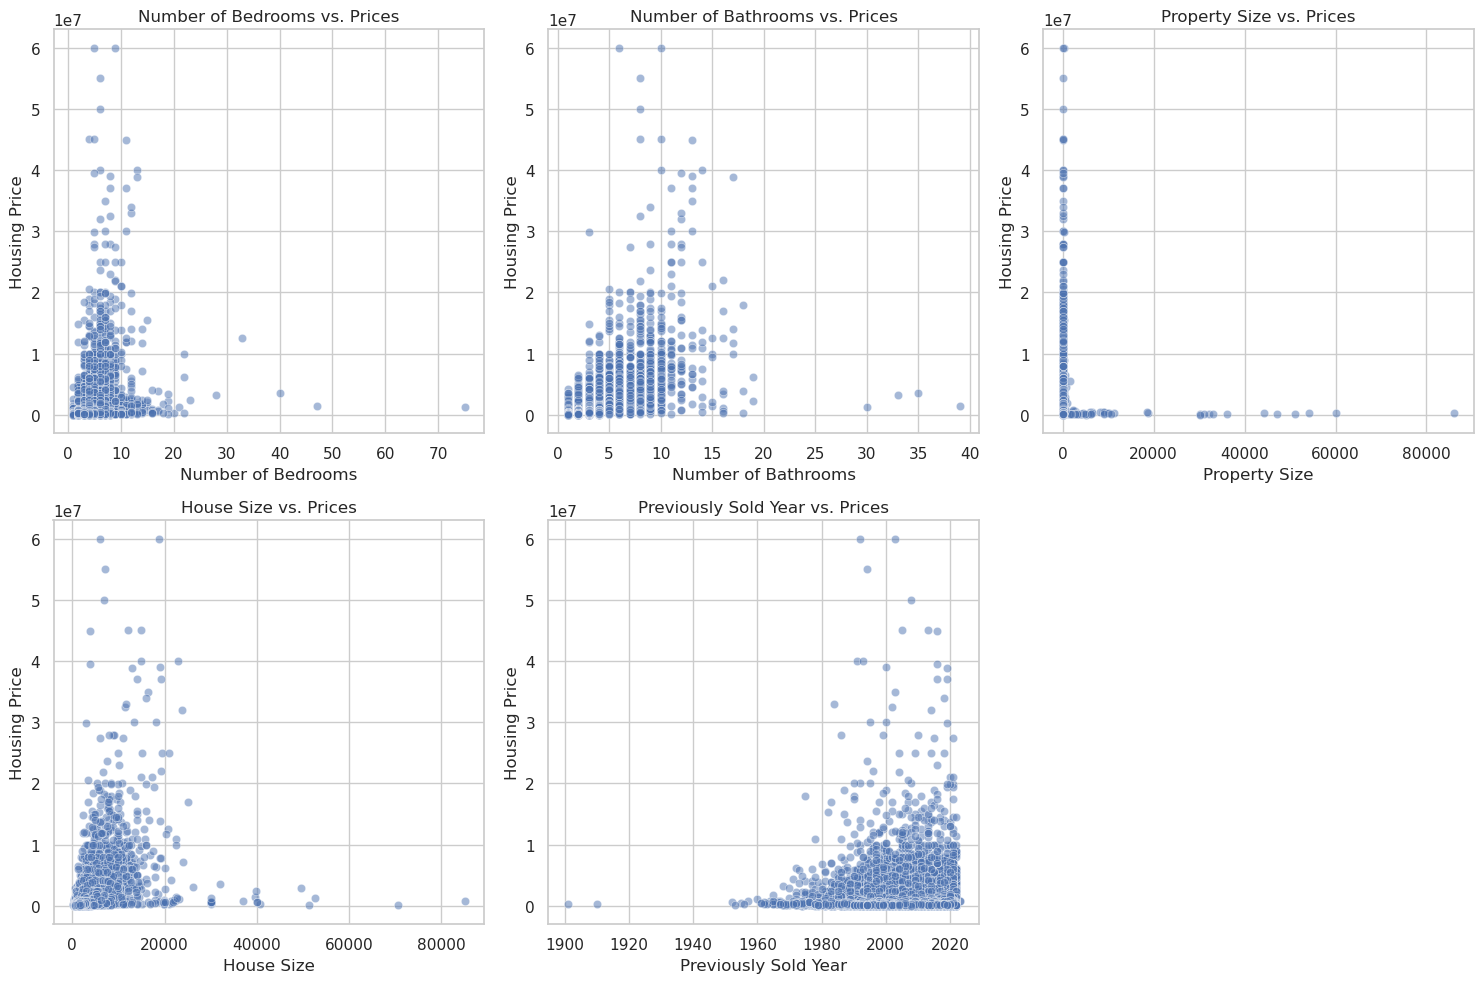

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Create a 2x3 grid for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Scatter plot for Prices & Bedrooms
sns.scatterplot(x='bed', y='price', data=cleanedData, alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Number of Bedrooms vs. Prices')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Housing Price')

# Scatter plot for Prices & Bathrooms
sns.scatterplot(x='bath', y='price', data=cleanedData, alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Number of Bathrooms vs. Prices')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Housing Price')

# Scatter plot for Prices & Property Size
sns.scatterplot(x='acre_lot', y='price', data=cleanedData, alpha=0.5, ax=axes[0, 2])
axes[0, 2].set_title('Property Size vs. Prices')
axes[0, 2].set_xlabel('Property Size')
axes[0, 2].set_ylabel('Housing Price')

# Scatter plot for Prices & House Size
sns.scatterplot(x='house_size', y='price', data=cleanedData, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('House Size vs. Prices')
axes[1, 0].set_xlabel('House Size')
axes[1, 0].set_ylabel('Housing Price')

# Scatter plot for Prices & Previously Sold Year
sns.scatterplot(x='prev_sold_year', y='price', data=cleanedData, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Previously Sold Year vs. Prices')
axes[1, 1].set_xlabel('Previously Sold Year')
axes[1, 1].set_ylabel('Housing Price')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Interpretation 

Each scatter plot examines the relationship between house prices and specific variables, such as the number of bedrooms, number of bathrooms, property size, house size, and previously sold year. These plots offer valuable insights into potential correlations between continuous variables, contributing to a comprehensive understanding of how various features may drive housing market prices.

1. **Number of Bedrooms vs. Price:**
This plot investigates whether houses with more bedrooms command higher prices. While a theoretical expectation would be an upward trend, the observed data indicates a very weak linear pattern, making it challenging to draw definitive conclusions about the association between the number of bedrooms and housing prices.

2. **Number of Bathrooms vs. Price:**
Similar to the bedrooms plot, this scatter plot explores whether a higher number of bathrooms correlates with increased housing prices. However, like the previous case, a very weak linear pattern is present, making it difficult to establish a clear relationship between bathroom count and property values.

3. **Property Size vs. Price:**
This scatter plot assesses whether larger properties, measured in square feet or another unit, are priced higher than their smaller counterparts. Contrary to expectations, no discernible pattern is evident in the data, indicating that property size may not have a linear correlation with housing prices in this dataset.

4. **House Size vs. Price:**
Similar to property size, this plot investigates whether a bigger house size correlates with an increase in house prices. However, like the other cases, a very weak linear pattern is observed, making it challenging to draw definitive conclusions about the relationship between house size and property values.

5. **Previously Sold Year vs. Price:**
This plot explores whether there is a discernible trend in housing prices over the years. However, the relationship between previously sold year and housing prices is not clear from the scatter plot. The absence of a distinct pattern makes it challenging to establish a direct association between temporal changes and property values.


In general, for a more precise interpretation, one would typically look for the slope of a fitted line in regression analysis, assess the spread of the points, and identify any patterns that suggest specific relationships. Statistical analyses, such as calculating correlation coefficients, would further quantify the observed relationships. It is crucial to note that the weak correlations presented in these plots highlight the need for more in-depth statistical analysis to draw meaningful conclusions about the influence of these variables on housing market prices.

## Average Housing Price by State and Previously Sold Year

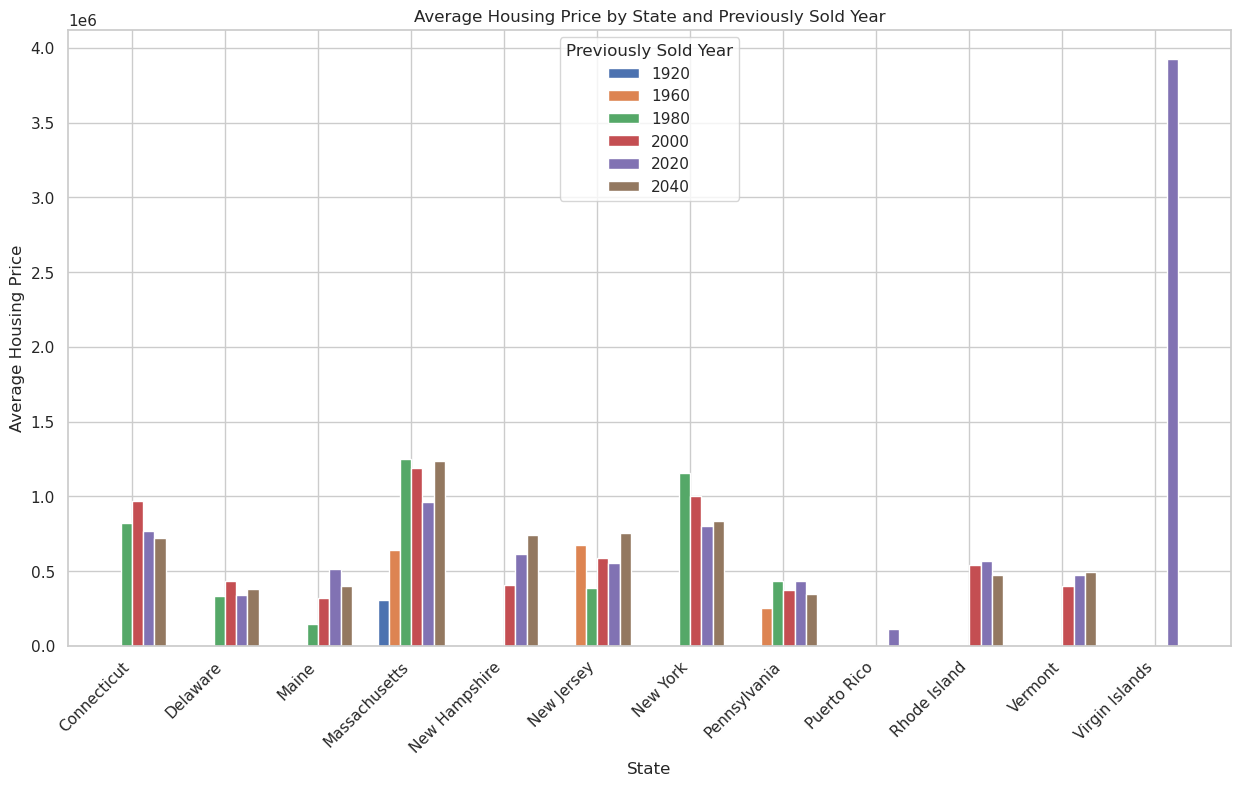

In [11]:
# First, create a DataFrame that contains the average prices for each combination of state and previously sold year
cleanedData['new_prev_sold_year'] = ((cleanedData['prev_sold_year'] - 1) // 20 + 1) * 20

grouped_prices = cleanedData.groupby(['state', 'new_prev_sold_year'])['price'].mean().unstack()

# Now plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 8))

# We need to create a bar position for each room type
bar_width = 0.12  # Set the width of each bar
indices = range(len(grouped_prices))  # The label locations
grouped_years = grouped_prices.columns.values
n_grouped_years = len(grouped_years)

# Create a bar for each room type
for i, grouped_year in enumerate(grouped_years):
    ax.bar([x + (i * bar_width) for x in indices], 
           grouped_prices[grouped_year], 
           width=bar_width, 
           label=grouped_year)
    
# Set the x-axis tick labels to the state with proper alignment and rotation
ax.set_xticks([x + (bar_width * (n_grouped_years / 2 - 0.5)) for x in indices])
ax.set_xticklabels(grouped_prices.index, rotation=45, ha='right')  # Inclined by 45 degrees, aligned to the right

# Add some labels and a title
ax.set_xlabel('State')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Price by State and Previously Sold Year')

# Add a legend
ax.legend(title='Previously Sold Year')

# Show the plot
plt.show()



## Interpretation

The grouped bar chart presents a detailed view of average housing prices across various states, color-coded to represent different years of the last property sale. This analysis aims to shed light on the trends and variations in housing prices over time within each state, addressing the following key points:

1. **State Distribution:**
The presence of multiple bars for each state underscores the dataset's longitudinal nature, capturing the dynamic nature of housing prices. This approach allows us to discern trends and patterns specific to individual states.

2. **Color Coding by Year:** 
The color-coded distinction serves as a visual cue for understanding temporal changes. Notably, the chosen years may align with crucial historical or economic events, offering insights into how these external factors impact housing prices. The intervals (e.g., 1960, 1980, 2000, 2020) warrant closer scrutiny to unveil potential correlations with broader economic trends.

3. **Price Trends:**
The nuanced examination of average housing prices provides valuable insights directly addressing our research question. Notably, in states like Connecticut and Delaware, there is a discernible uptick in average prices in 2020, indicative of a contemporary surge in demand. Conversely, Massachusetts and New York witnessed a surge in the 1980s, prompting a need for a nuanced investigation into the local market dynamics of that era. This temporal variation underscores the heterogeneity in regional housing markets, emphasizing the importance of exploring each state's unique economic and demographic landscape to comprehensively understand the observed trends in housing prices.

4. **Outliers or Extreme Values:** 
States exhibiting exceptionally high average prices in specific years, such as the state of Virgine Islands in 2020, raise intriguing questions. Are these outliers indicative of unique real estate markets, high-profile sales, or other influential factors? Understanding the drivers behind these outliers is pivotal to discerning whether they align with our research focus or needs separate analysis.
   
To enhance interpretability for future projects, I consider adjusting the y-axis scale or limiting the range to ensure visibility of variations across states and years. This approach can mitigate the potential distortion caused by outliers and facilitate a clearer understanding of the overarching trends in the dataset.

## IV. Average Price by State and Bedroom Category

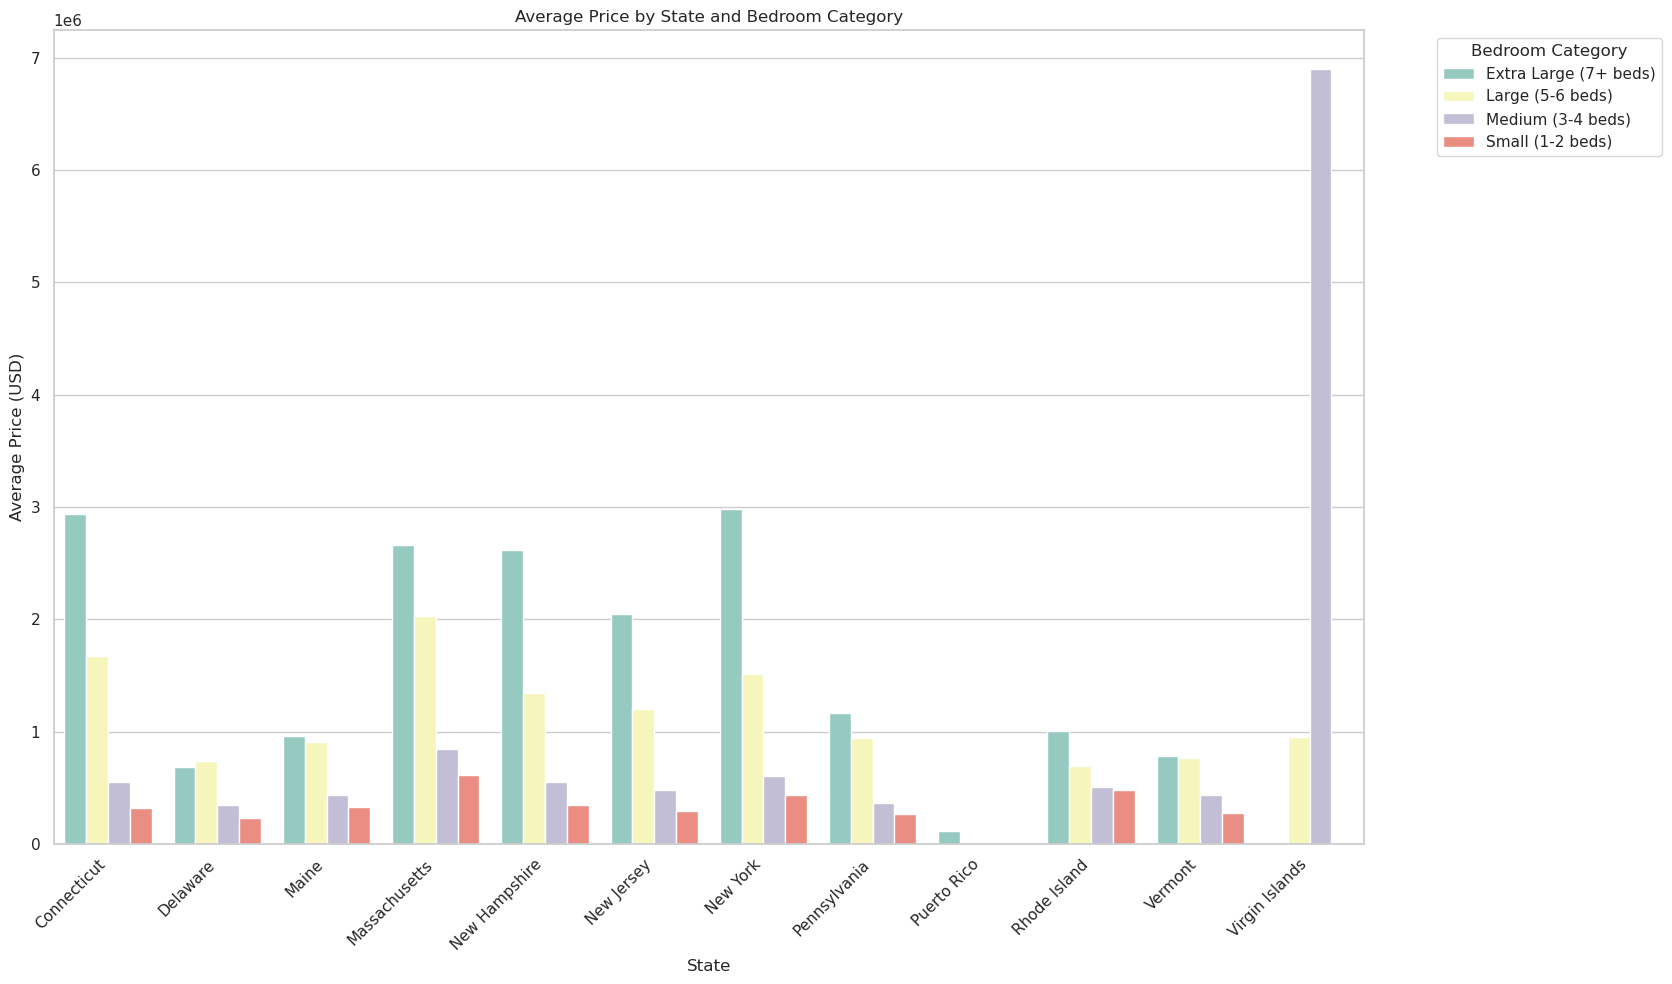

In [12]:
# Assuming 'cleanedData' is your DataFrame and 'state' and 'bed' are the columns of interest

# Define a new column 'bed_category' based on 'bed' subgroups
def bed_category(beds):
    if beds <= 2:
        return 'Small (1-2 beds)'
    elif beds <= 4:
        return 'Medium (3-4 beds)'
    elif beds <= 6:
        return 'Large (5-6 beds)'
    else:
        return 'Extra Large (7+ beds)'

cleanedData['bed_category'] = cleanedData['bed'].apply(bed_category)

# Group the data by 'state' and 'bed_category' and calculate the average price
grouped_data = cleanedData.groupby(['state', 'bed_category'])['price'].mean().reset_index()

# Increase the figure size for better visibility
plt.figure(figsize=(20, 10))

# Plot the grouped bar chart using seaborn
sns.barplot(x='state', y='price', hue='bed_category', data=grouped_data, palette='Set3', dodge=0.8)

# Add titles and labels
plt.title('Average Price by State and Bedroom Category')
plt.xlabel('State')
plt.ylabel('Average Price (USD)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Place the legend outside the plot to avoid covering the bars
plt.legend(title='Bedroom Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with improved layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend
plt.show()

## Interpretation

The grouped bar chart provides a comprehensive overview of average housing prices across states, categorized by the number of bedrooms, ranging from "Small (1-2 beds)" to "Extra Large (7+ beds)." The analysis emphasizes key aspects for a more detailed understanding:

1. **States as Categories:** 
The x-axis categorizes each state, with multiple bars illustrating average housing prices for distinct bedroom categories within that state. This categorization facilitates a state-wise comparison of housing prices across different bedroom sizes.

2. **Bedroom Categories:**
Colored bars delineate various bedroom sizes, allowing for a visual assessment of average prices within each state. Each color corresponds to a specific category, enabling a direct comparison of housing costs based on the number of bedrooms.

3. **Price Distribution:**
The y-axis showcases average prices in USD, with varying ranges by state and bedroom category. Taller bars signify higher average prices for the respective bedroom category within each state, offering a clear visual representation of housing cost disparities.

4. **Interpreting the Data:**
   - The consistently taller bars in the "Extra Large" category across most states indicate higher housing prices, followed by the "Large" category. This trend suggests that larger number of bedrooms generally command higher prices in the housing market.
   - Notably, Puerto Rico stands out as the only state with a singular category, specifically "Extra Large," potentially reflecting a unique housing market structure or preferences within the region.
   - The Virgin Islands, distinguished by a predominance of the "Medium" bedroom category, coupled with the highest average price among states, prompts an intriguing hypothesis. The higher living costs in this state could be attributed to its location, and the prominence of medium-sized properties may indicate a unique demand pattern.

Relating these findings to the research question, "How Property Features Drive Housing Market Prices?" implies that the number of bedrooms could influences housing costs. The consistent prominence of higher average prices for larger bedroom categories underscores the impact of property features on pricing. The unique characteristics observed in Puerto Rico and the Virgin Islands offer valuable insights into regional housing dynamics, suggesting that local factors, such as housing preferences and living costs, play a crucial role in shaping property prices. Further investigation into these localized patterns can contribute to a more nuanced understanding of how specific property features drive housing market prices in diverse regions.


## V. Correlation Matrix of Variables

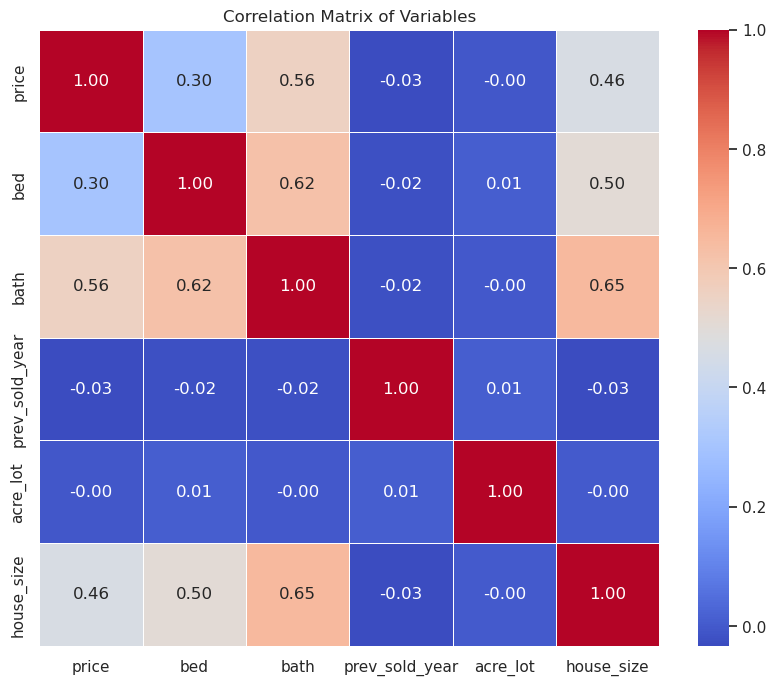

In [13]:
#Correlation matrix:

# Selecting the variables of interest
selected_columns = ['price', 'bed', 'bath', 'prev_sold_year', 
                    'acre_lot', 'house_size']
# Creating the correlation matrix
correlation_matrix = cleanedData[selected_columns].corr()

# Visualizing the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Variables')
plt.show()

## Interpretation

The correlation matrix heatmap serves as a comprehensible lens through which to interpret the interplay among various housing-related variables, offering a more approachable perspective compared to earlier scatterplots. The provided guide enriches our grasp of the findings:

1. **Self-Correlation (1.00 along the diagonal):** This represents the correlation of each variable with itself, which is always 1.

2. **Values Close to 1 or -1:** Indicate strong positive or negative linear relationships. Notably, the number of bathrooms (bath) exhibits a robust positive correlation with the number of bedrooms (bed) and house size, suggesting that as bathrooms increase, bedrooms and house size tend to rise as well.

3. **Values Close to 0:** Suggest little to no linear relationship. For instance, the variable representing the year of the last sale (prev_sold_year) demonstrates a minimal correlation with other variables, implying an absence of a linear relationship.

4. **Positive Values:** Signify positive correlations, such as the moderate positive correlation between house price and the number of bathrooms (0.56). This implies that higher-priced houses tend to have more bathrooms.

5. **Negative Values:** Although no strong negative correlations are presented in this matrix, negative values would indicate an inverse relationship between variables.

The insight into the relationship between house size and other variables is particularly noteworthy. House size exhibits a strong correlation with the number of bathrooms and a moderate correlation with the number of bedrooms and house price. This suggests that larger houses tend to have more bathrooms and bedrooms and are generally associated with higher prices.

Relating these findings to the research goal, implies that certain features, notably the number of bathrooms and house size, play a significant role in influencing housing prices. The positive correlations identified provide insights into how specific property features tend to coexist and contribute collectively to housing market dynamics. This understanding is crucial for predicting house prices, identifying feature combinations that appeal to buyers, and forms a foundation for further statistical modeling, such as regression analysis, to unravel the intricate relationships shaping the housing market.

## Conclusion

In conclusion, our exploration into the intricate dynamics of housing market prices has revealed significant patterns related to various property features. The correlation matrix heatmap has emerged as a valuable tool, shedding light on the strong positive correlations between house size and the number of bathrooms and bedrooms. This compelling insight underscores the pivotal role that larger houses play in influencing housing prices, aligning with the intuitive understanding that increased space and amenities contribute to elevated property values. These correlations provide essential guidance for both homebuyers and sellers, offering a nuanced perspective on how specific property features collectively shape the dynamics of the housing market.

Moreover, the grouped bar chart, which categorizes average housing prices by state and bedroom categories, provides a comprehensive view of regional influences on pricing trends. The consistent prominence of higher prices for larger bedroom categories across states reaffirms the influential role of the number of bedrooms in determining housing costs. This not only directly addresses our research question regarding the impact of property features on housing market prices but also offers practical insights for individuals involved in real estate transactions. As we navigate the complexities of the housing market, understanding how distinct features contribute to pricing trends becomes paramount. These findings, coupled with the correlation matrix, lay a foundation for more informed decision-making, empowering stakeholders to navigate the real estate landscape with a comprehensive understanding of the factors that drive housing market prices.

## Reference

Realtor.com®: Homes for sale, apartments & Houses for Rent. realtor.com. (n.d.). https://www.realtor.com/ 

Padala, A. (2021, April 12). Determinants of housing price. Medium. https://apadala-90574.medium.com/determinants-of-housing-price-bdefc783cf6b 